# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport

import statsmodels.formula.api as smf
import warnings

from sklearn.metrics import roc_curve
from sklearn import metrics
from scipy.stats import ks_2samp

warnings.filterwarnings("ignore")
%matplotlib inline

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [3]:
colunas = {'age': 'idade', 'sex': 'sexo', 'cp': 'tipo_dor_peito', 'trestbps': 'pressao_sanguínea_repouso',
    'chol': 'colesterol', 'fbs': 'glicemia_jejum', 'restecg': 'resultados_eletrocardiograma',
    'thalach': 'freq_card_max', 'exang': 'angina_exercicio', 'oldpeak': 'depressao_st_exercicio',
    'slope': 'inclinacao_st_exercicio', 'ca': 'num_vasos_coloridos', 'thal': 'defeito', 'num': 'diagnostico_doenca'}
df.rename(columns=colunas, inplace=True)

df['flag_doente'] = (df['diagnostico_doenca'] != 0).astype('int64')
df

,idade,sexo,tipo_dor_peito,pressao_sanguínea_repouso,colesterol,glicemia_jejum,resultados_eletrocardiograma,freq_card_max,angina_exercicio,depressao_st_exercicio,inclinacao_st_exercicio,num_vasos_coloridos,defeito,diagnostico_doenca,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    float64
 1   sexo                          303 non-null    float64
 2   tipo_dor_peito                303 non-null    float64
 3   pressao_sanguínea_repouso     303 non-null    float64
 4   colesterol                    303 non-null    float64
 5   glicemia_jejum                303 non-null    float64
 6   resultados_eletrocardiograma  303 non-null    float64
 7   freq_card_max                 303 non-null    float64
 8   angina_exercicio              303 non-null    float64
 9   depressao_st_exercicio        303 non-null    float64
 10  inclinacao_st_exercicio       303 non-null    float64
 11  num_vasos_coloridos           303 non-null    object 
 12  defeito                       303 non-null    object 
 13  diagn

In [5]:
df['num_vasos_coloridos'] = df['num_vasos_coloridos'].replace('?', np.nan)
df = df.dropna()
df['num_vasos_coloridos'] = df['num_vasos_coloridos'].astype(float).astype('int64')
df['num_vasos_coloridos'].value_counts()

num_vasos_coloridos
0    176
1     65
2     38
3     20
Name: count, dtype: int64

In [6]:
df['defeito'] = df['defeito'].replace('?', np.nan)
df = df.dropna()
df['defeito'] = df['defeito'].astype(float).astype('int64')
df['defeito'].value_counts()

defeito
3    164
7    115
6     18
Name: count, dtype: int64

In [7]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof.to_file('./output/resumo.html')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         297 non-null    float64
 1   sexo                          297 non-null    float64
 2   tipo_dor_peito                297 non-null    float64
 3   pressao_sanguínea_repouso     297 non-null    float64
 4   colesterol                    297 non-null    float64
 5   glicemia_jejum                297 non-null    float64
 6   resultados_eletrocardiograma  297 non-null    float64
 7   freq_card_max                 297 non-null    float64
 8   angina_exercicio              297 non-null    float64
 9   depressao_st_exercicio        297 non-null    float64
 10  inclinacao_st_exercicio       297 non-null    float64
 11  num_vasos_coloridos           297 non-null    int64  
 12  defeito                       297 non-null    int64  
 13  diagnostic

In [9]:
#Entendimento das variáveis qualitativas e quantitativas
for coluna in df.columns:
    print(f"Contagem de valores para {coluna}:")
    print(df[coluna].value_counts())
    print("\n")

Contagem de valores para idade:
idade
58.0    18
57.0    17
54.0    16
59.0    14
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
52.0    11
64.0    10
41.0    10
67.0     9
63.0     9
42.0     8
45.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
43.0     7
48.0     7
53.0     7
46.0     7
47.0     5
49.0     5
70.0     4
68.0     4
35.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
29.0     1
77.0     1
38.0     1
74.0     1
76.0     1
Name: count, dtype: int64


Contagem de valores para sexo:
sexo
1.0    201
0.0     96
Name: count, dtype: int64


Contagem de valores para tipo_dor_peito:
tipo_dor_peito
4.0    142
3.0     83
2.0     49
1.0     23
Name: count, dtype: int64


Contagem de valores para pressao_sanguínea_repouso:
pressao_sanguínea_repouso
120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
160.0    11
138.0    10
128.0    10
125.0    10
112.0     9
132.0     7
118.0     7
124.0     6
108.0     6
135.0     6
152.0     5

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [10]:
def tabela_bivariada_qualitativas(dataframe, var_resposta, var_explicativa):
    tab = pd.crosstab(dataframe[var_resposta], dataframe[var_explicativa], margins=True, margins_name='total')
    tab['média de doentes'] = tab[1] / tab['total']
    tab['odds_doente'] = tab[1] / tab[0]
    tab['odds_ratio'] = tab['odds_doente']/tab.loc['total','odds_doente']
    tab['logito'] = np.log(tab['odds_doente'])
    tab['WOE'] = np.log(tab['odds_ratio'])
    return tab

In [11]:
tabela_bivariada_qualitativas(df, 'inclinacao_st_exercicio', 'flag_doente')

flag_doente,0,1,total,média de doentes,odds_doente,odds_ratio,logito,WOE
inclinacao_st_exercicio,,,,,,,,
1.0,103,36,139,0.258993,0.349515,0.408192,-1.051210,-0.896017
2.0,48,89,137,0.649635,1.854167,2.165450,0.617435,0.772628
3.0,9,12,21,0.571429,1.333333,1.557178,0.287682,0.442875
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


In [12]:
tabela_bivariada_qualitativas(df, 'num_vasos_coloridos', 'flag_doente')

flag_doente,0,1,total,média de doentes,odds_doente,odds_ratio,logito,WOE
num_vasos_coloridos,,,,,,,,
0,129,45,174,0.258621,0.348837,0.407401,-1.053150,-0.897957
1,21,44,65,0.676923,2.095238,2.446993,0.739667,0.894860
2,7,31,38,0.815789,4.428571,5.172054,1.488077,1.643270
3,3,17,20,0.850000,5.666667,6.618005,1.734601,1.889794
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


### Insight:
Analisando as bivariadas acima, podemos ver que as variáveis ```num_vasos_coloridos``` e ```angina_exercício``` mostraram números de risco significativos.

 2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [13]:
def tabela_bivariada_quantitativas(dataframe, var_resposta, var_explicativa, num_categorias=5):
    dataframe['categoria_explicativa'] = pd.cut(dataframe[var_resposta], bins=num_categorias, duplicates='drop')
    tab = pd.crosstab(dataframe['categoria_explicativa'], 
                      dataframe[var_explicativa],
                      margins=True, 
                      margins_name='total')
    if 1 in tab.columns and 0 in tab.columns:
        tab['percentual'] = tab[1] / tab['total']
        tab['média de doentes'] = tab[1] / tab['total']
        tab['odds_doente'] = tab[1] / tab[0]
        tab['odds_ratio'] = tab['odds_doente'] / tab.loc['total','odds_doente']
        tab['logito'] = np.log(tab['odds_doente'])
        tab['WOE'] = np.log(tab['odds_ratio'])
    else:
        tab['percentual'] = 0
        tab['média de doentes'] = 0
        tab['odds_doente'] = 0
        tab['odds_ratio'] = 0
        tab['logito'] = 0
        tab['WOE'] = 0
    return tab

In [14]:
tabela_bivariada_quantitativas(df, 'idade', 'flag_doente', 5)

flag_doente,0,1,total,percentual,média de doentes,odds_doente,odds_ratio,logito,WOE
categoria_explicativa,,,,,,,,,
"(28.952, 38.6]",7,3,10,0.300000,0.300000,0.428571,0.500521,-0.847298,-0.692105
"(38.6, 48.2]",50,20,70,0.285714,0.285714,0.400000,0.467153,-0.916291,-0.761098
"(48.2, 57.8]",54,40,94,0.425532,0.425532,0.740741,0.865099,-0.300105,-0.144912
"(57.8, 67.4]",39,67,106,0.632075,0.632075,1.717949,2.006363,0.541131,0.696324
"(67.4, 77.0]",10,7,17,0.411765,0.411765,0.700000,0.817518,-0.356675,-0.201482
total,160,137,297,0.461279,0.461279,0.856250,1.000000,-0.155193,0.000000


In [15]:
tabela_bivariada_quantitativas(df, 'pressao_sanguínea_repouso', 'flag_doente')

flag_doente,0,1,total,percentual,média de doentes,odds_doente,odds_ratio,logito,WOE
categoria_explicativa,,,,,,,,,
"(93.894, 115.2]",32,20,52,0.384615,0.384615,0.625000,0.729927,-0.470004,-0.314811
"(115.2, 136.4]",77,60,137,0.437956,0.437956,0.779221,0.910039,-0.249461,-0.094268
"(136.4, 157.6]",42,39,81,0.481481,0.481481,0.928571,1.084463,-0.074108,0.081085
"(157.6, 178.8]",8,14,22,0.636364,0.636364,1.750000,2.043796,0.559616,0.714809
"(178.8, 200.0]",1,4,5,0.800000,0.800000,4.000000,4.671533,1.386294,1.541487
total,160,137,297,0.461279,0.461279,0.856250,1.000000,-0.155193,0.000000


In [16]:
tabela_bivariada_quantitativas(df, 'pressao_sanguínea_repouso', 'flag_doente')

flag_doente,0,1,total,percentual,média de doentes,odds_doente,odds_ratio,logito,WOE
categoria_explicativa,,,,,,,,,
"(93.894, 115.2]",32,20,52,0.384615,0.384615,0.625000,0.729927,-0.470004,-0.314811
"(115.2, 136.4]",77,60,137,0.437956,0.437956,0.779221,0.910039,-0.249461,-0.094268
"(136.4, 157.6]",42,39,81,0.481481,0.481481,0.928571,1.084463,-0.074108,0.081085
"(157.6, 178.8]",8,14,22,0.636364,0.636364,1.750000,2.043796,0.559616,0.714809
"(178.8, 200.0]",1,4,5,0.800000,0.800000,4.000000,4.671533,1.386294,1.541487
total,160,137,297,0.461279,0.461279,0.856250,1.000000,-0.155193,0.000000


In [17]:
tabela_bivariada_quantitativas(df, 'depressao_st_exercicio', 'flag_doente')

flag_doente,0,1,total,percentual,média de doentes,odds_doente,odds_ratio,logito,WOE
categoria_explicativa,,,,,,,,,
"(-0.0062, 1.24]",128,65,193,0.336788,0.336788,0.507812,0.593066,-0.677643,-0.522450
"(1.24, 2.48]",28,36,64,0.562500,0.562500,1.285714,1.501564,0.251314,0.406507
"(2.48, 3.72]",3,28,31,0.903226,0.903226,9.333333,10.900243,2.233592,2.388785
"(3.72, 4.96]",1,6,7,0.857143,0.857143,6.000000,7.007299,1.791759,1.946952
"(4.96, 6.2]",0,2,2,1.000000,1.000000,inf,inf,inf,inf
total,160,137,297,0.461279,0.461279,0.856250,1.000000,-0.155193,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [18]:
reglog = smf.logit(" flag_doente ~ C(sexo) + C(tipo_dor_peito) + pressao_sanguínea_repouso + idade", data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.480667
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.3035
Time:                        23:05:35   Log-Likelihood:                -142.76
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.910e-24
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.3249      1.617     -5.149      0.000     -11.494      -5.156
C(sexo)[T.1.0]                1.7989      0.352      5.112      0.000       1.109       2.489
C(tipo_dor_peito)[T.2.0]     -0.0167      0.638     -0.026      0.979      -1.267       1.233
C(tipo_dor_peito)[T.3.0]      0.1132      0.574      0.197      0.844      -1.011       1.238
C(tipo_dor_peito)[T.4.0]      2.4547      0.553      4.443      0.000       1.372       3.538
pressao_sanguínea_repouso     0.0192      0.009      2.255      0.024       0.003       0.036
idade                         0.0568      0.018      3.110      0.002       0.021       0.093
=============================================================================================
"""

### insight: 
Podemos retirar do resumo acima as seguintes informações que nos ajudam a explicar pacientes doentes:
- Pacientes do sexo masculino são mais propensos.
- Pacientes com dor no peito tipo 4 (assintomático) são relevantes para a análise.
- Tipo 2 e 3 de dor no peito não são relevantes para nossa análise, visto que o p-valor de ambas é superior a 5%.
    

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [19]:
df['predito'] = reglog.predict(df)
df.head(3)

,idade,sexo,tipo_dor_peito,pressao_sanguínea_repouso,colesterol,glicemia_jejum,resultados_eletrocardiograma,freq_card_max,angina_exercicio,depressao_st_exercicio,inclinacao_st_exercicio,num_vasos_coloridos,defeito,diagnostico_doenca,flag_doente,categoria_explicativa,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,6,0,0,"(1.24, 2.48]",0.458086
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,3,2,1,"(1.24, 2.48]",0.942756
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,7,1,1,"(2.48, 3.72]",0.884350


In [20]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

predito
(0.0139, 0.149]    61
(0.149, 0.29]      58
(0.29, 0.583]      59
(0.583, 0.819]     61
(0.819, 0.943]     58
Name: count, dtype: int64

In [21]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.0139, 0.149]",61
"(0.149, 0.29]",58
"(0.29, 0.583]",59
"(0.583, 0.819]",61
"(0.819, 0.943]",58


In [22]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0139, 0.149]",61,0.075238
"(0.149, 0.29]",58,0.216382
"(0.29, 0.583]",59,0.440109
"(0.583, 0.819]",61,0.707344
"(0.819, 0.943]",58,0.874928


In [23]:
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0139, 0.149]",61,0.075238,0.081967
"(0.149, 0.29]",58,0.216382,0.155172
"(0.29, 0.583]",59,0.440109,0.508475
"(0.583, 0.819]",61,0.707344,0.737705
"(0.819, 0.943]",58,0.874928,0.827586


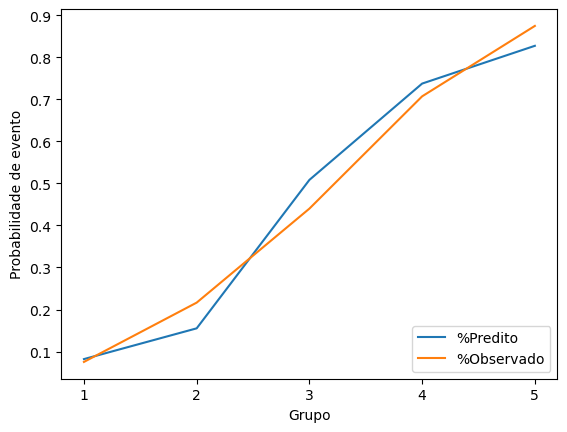

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')
plt.show() 

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

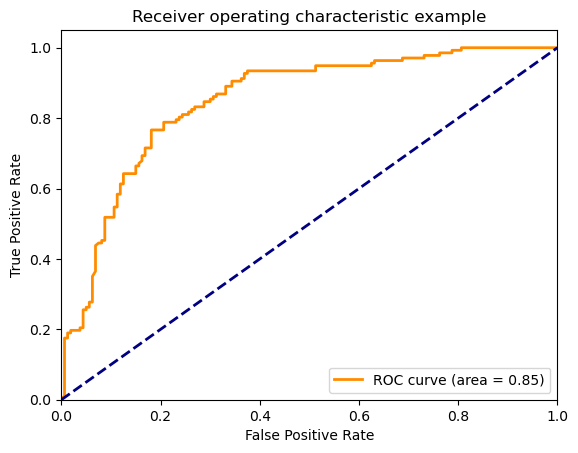

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Função Distribuição Acumulada')

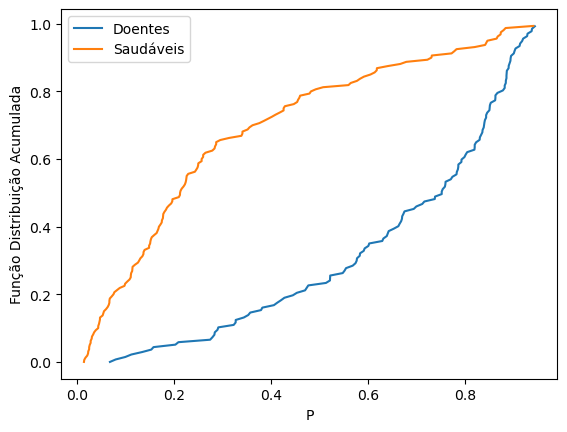

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudáveis')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')


In [27]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.12%
KS: 58.52% 
AUC: 84.87% 
GINI: 69.74%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [28]:
#selecionando todas as colunas para colocar na reg
lista_de_colunas = df.drop(columns=['diagnostico_doenca', 'flag_doente', 'predito', 'categoria_explicativa'])
transformar = ' + '.join(lista_de_colunas)
transformar

'idade + sexo + tipo_dor_peito + pressao_sanguínea_repouso + colesterol + glicemia_jejum + resultados_eletrocardiograma + freq_card_max + angina_exercicio + depressao_st_exercicio + inclinacao_st_exercicio + num_vasos_coloridos + defeito'

In [29]:
reglog2 = smf.logit('flag_doente ~idade + sexo + tipo_dor_peito + pressao_sanguínea_repouso +'
                    '+ colesterol + glicemia_jejum + resultados_eletrocardiograma + '
                    'freq_card_max + angina_exercicio + depressao_st_exercicio + '
                    'inclinacao_st_exercicio + num_vasos_coloridos + defeito', data=df).fit()
reglog2.summary()

Optimization terminated successfully.
         Current function value: 0.344594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           13
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.5007
Time:                        23:05:36   Log-Likelihood:                -102.34
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.136e-36
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -7.3720      2.879     -2.560      0.010     -13.016      -1.728
idade                           -0.0142      0.024     -0.591      0.555      -0.061       0.033
sexo                             1.3121      0.488      2.686      0.007       0.355       2.269
tipo_dor_peito                   0.5759      0.191      3.012      0.003       0.201       0.951
pressao_sanguínea_repouso        0.0240      0.011      2.241      0.025       0.003       0.045
colesterol                       0.0050      0.004      1.324      0.186      -0.002       0.012
glicemia_jejum                  -1.0219      0.555     -1.840      0.066      -2.110       0.067
resultados_eletrocardiograma     0.2452      0.185      1.325      0.185      -0.117       0.608
freq_card_max                   -0.0207      0.010     -2.021      0.043      -0.041      -0.001
angina_exercicio                 0.9261      0.413      2.241      0.025       0.116       1.736
depressao_st_exercicio           0.2474      0.212      1.168      0.243      -0.168       0.663
inclinacao_st_exercicio          0.5700      0.363      1.570      0.116      -0.142       1.282
num_vasos_coloridos              1.2677      0.265      4.777      0.000       0.748       1.788
defeito                          0.3439      0.100      3.427      0.001       0.147       0.541
================================================================================================
"""

In [30]:
# Retiramos todas as variaveis que tinham p valor superior a 0.05
reglog2 = smf.logit('flag_doente ~ sexo + tipo_dor_peito + pressao_sanguínea_repouso'
                    '+ C(inclinacao_st_exercicio) + angina_exercicio + num_vasos_coloridos'
                    '+ defeito', data=df).fit()

reglog2.summary()

Optimization terminated successfully.
         Current function value: 0.361154
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.4767
Time:                        23:05:36   Log-Likelihood:                -107.26
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 5.887e-38
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -9.5227      1.680     -5.668      0.000     -12.815      -6.230
C(inclinacao_st_exercicio)[T.2.0]     1.4450      0.381      3.790      0.000       0.698       2.192
C(inclinacao_st_exercicio)[T.3.0]     0.9735      0.655      1.486      0.137      -0.310       2.257
sexo                                  1.2300      0.441      2.786      0.005       0.365       2.095
tipo_dor_peito                        0.6474      0.187      3.462      0.001       0.281       1.014
pressao_sanguínea_repouso             0.0226      0.010      2.304      0.021       0.003       0.042
angina_exercicio                      1.0518      0.398      2.640      0.008       0.271       1.833
num_vasos_coloridos                   1.2498      0.236      5.296      0.000       0.787       1.712
defeito                               0.3411      0.097      3.518      0.000       0.151       0.531
=====================================================================================================
"""

In [31]:
q6 = df.drop(columns=['categoria_explicativa','predito'])
q6['predito'] = reglog2.predict()
cat_pred2 = pd.qcut(q6['predito'], 5, duplicates='drop')
group_reg2 = q6.groupby(cat_pred2)
qualid2 = group_reg2[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid2['predito'] = group_reg2['predito'].mean()
qualid2['pct_doente'] = group_reg2['flag_doente'].mean()
qualid2

,contagem,predito,pct_doente
predito,,,
"(0.00692, 0.0826]",60,0.039312,0.050000
"(0.0826, 0.21]",59,0.133293,0.118644
"(0.21, 0.622]",59,0.376644,0.355932
"(0.622, 0.914]",59,0.787412,0.830508
"(0.914, 0.998]",60,0.968294,0.950000


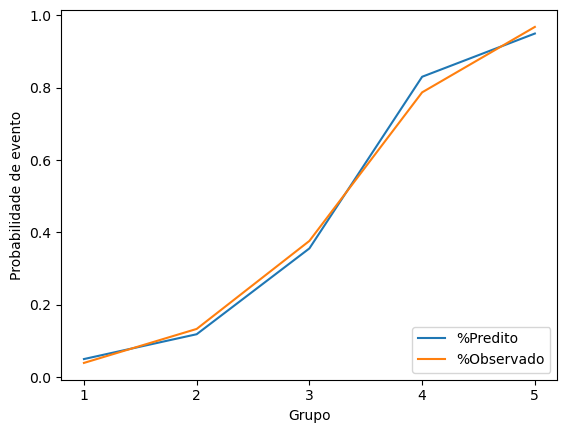

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid2['pct_doente'].plot(label='%Predito')
ax = qualid2['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')
plt.show() 

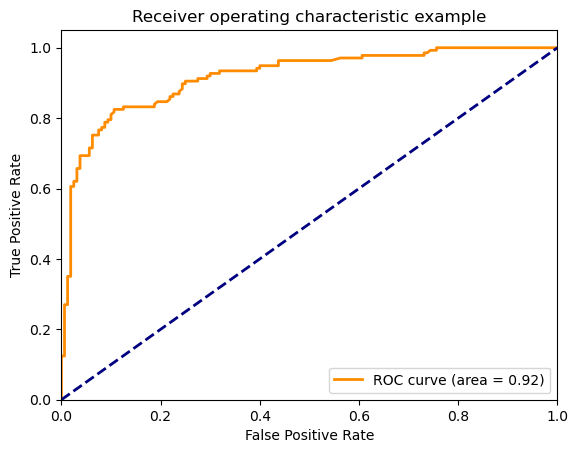

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(q6['flag_doente'], q6['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(q6['flag_doente'], q6['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Função Distribuição Acumulada')

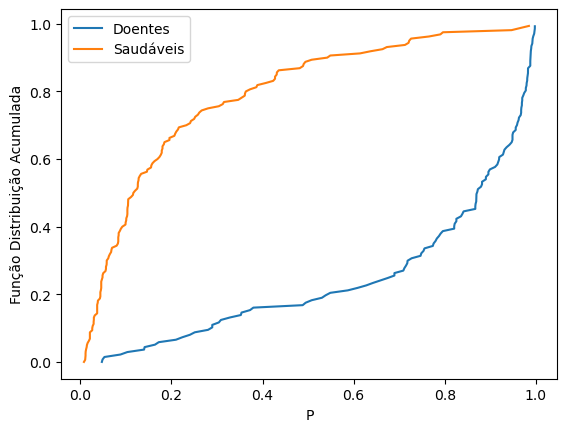

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = q6.loc[q6['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

score_pop2 = q6.loc[q6['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudáveis')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [35]:
acc = metrics.accuracy_score(q6['flag_doente'], q6['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(q6['flag_doente'], q6['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(q6.loc[q6['flag_doente'] == 1, 'predito'], q6.loc[q6['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 85.86%
KS: 71.86% 
AUC: 91.73% 
GINI: 83.47%


### Insight:

Antes de apagar cada variável em que o p-valor era maior que 0,05, transformei-a em dummy, e apenas a variável que mostrou relação foi ```inclinacao_st_exercicio ```, que preferi manter no modelo.

Após rodar o modelo com as alterações, notamos que houve um aumento considerável dos índices de qualidade, sendo eles:

- Acurácia de 79,12% para 85,86%;
- KS de 58,52% para 71,86%;
- AUC de 84,87% para 91,73%;
- GINI de 69,74% para 83,47%;